In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
pd.set_option('display.max_columns', None)

## Read Data

In [3]:
df = pd.read_csv("data/Perth_Housing.csv")

In [4]:
df.head()

,Unnamed: 0,Land_size,Building_size,Build_year,Agent,Distance,Transport,Sold_Price,Sold_Date,Rent_Price,Rent_Date,Property_Type,Bedrooms,Bathrooms,Cars,Address,Suburb,Last_Sold_Price,Last_Sold_Date,List,List_days_on_market,List_upper,List_lower,Postcode,STREET_TYPE_CODE,STREET_NAME,FLAT_NUMBER,NUMBER_FIRST,NUMBER_LAST,FLAT_FIRST,FLAT_LAST,LONGITUDE,LATITUDE,ADDR,CBD_distance_m,Closest_station_m,Sold_timestamp,Rent_timestamp,Last_Sold_timestamp,Sold_Date_diff,Suburb_state,State
0,0,999.0,NaN,NaN,NaN,7.1 km to CBD,2 km to Karrakatta Station [Transport],1420000,Jan 2020,NaN,NaN,House,3.0,1.0,1.0,1 BETTY STREET,NEDLANDS,NaN,NaN,NaN,NaN,NaN,NaN,6009,STREET,BETTY,NaN,1,NaN,NaN,NaN,115.796240,-31.986680,1 BETTY STREET,7100.0,2000.0,1.577797e+09,NaN,NaN,NaN,"Nedlands, WA",WA
1,1,145.0,134.0,1981.0,Shellabears - Cottesloe,7 km to CBD,1.1 km to Loch Street Station [Transport],910000,Feb 2018,570.0,Jul 2019,House,3.0,2.0,6.0,1A BULIMBA ROAD,NEDLANDS,850000.0,Mar 2007,949000.0,34.0,NaN,NaN,6009,ROAD,BULIMBA,NaN,1,NaN,NaN,NaN,115.793680,-31.981553,1 BULIMBA ROAD,7000.0,1100.0,1.517404e+09,1.561903e+09,1.172668e+09,344736000.0,"Nedlands, WA",WA
2,2,119.0,86.0,1998.0,NaN,1.3 km to CBD,918 metres to City West Station [Transport],385000,Dec 2020,NaN,NaN,Unit,NaN,NaN,NaN,65/1 CARR STREET,WEST PERTH,255000.0,May 2004,NaN,NaN,NaN,NaN,6005,STREET,CARR,65,1,NaN,65,NaN,115.854492,-31.941592,1 CARR STREET,1300.0,918.0,1.606741e+09,NaN,1.083334e+09,523407600.0,"West Perth, WA",WA
3,3,115.0,85.0,1998.0,NaN,1.3 km to CBD,918 metres to City West Station [Transport],430000,Dec 2020,495.0,Mar 2017,Unit,3.0,2.0,1.0,38/1 CARR STREET,WEST PERTH,NaN,NaN,NaN,NaN,NaN,NaN,6005,STREET,CARR,38,1,NaN,38,NaN,115.854492,-31.941592,1 CARR STREET,1300.0,918.0,1.606741e+09,1.488287e+09,NaN,NaN,"West Perth, WA",WA
4,4,NaN,NaN,NaN,TM Residential - Dalkeith,5.3 km to CBD,3.5 km to Daglish Station [Transport],771000,Mar 2015,NaN,NaN,Townhouse,3.0,2.0,2.0,1-24 COOK STREET,CRAWLEY,NaN,NaN,700000.0,11.0,NaN,NaN,6009,STREET,COOK,NaN,1,24,NaN,NaN,NaN,NaN,1 COOK STREET,5300.0,3500.0,1.425128e+09,NaN,NaN,NaN,"Crawley, WA",WA


In [5]:
df = df.drop(["Unnamed: 0"], axis = 1)

In [6]:
df.describe()

,Land_size,Building_size,Build_year,Sold_Price,Rent_Price,Bedrooms,Bathrooms,Cars,Last_Sold_Price,List,List_days_on_market,List_upper,List_lower,Postcode,FLAT_LAST,LONGITUDE,LATITUDE,CBD_distance_m,Closest_station_m,Sold_timestamp,Rent_timestamp,Last_Sold_timestamp,Sold_Date_diff
count,1918.000000,1193.000000,1561.000000,2.400000e+03,1262.000000,2215.000000,2064.000000,1903.000000,8.970000e+02,3.850000e+02,365.000000,2.500000e+01,2.500000e+01,2400.000000,1.0,2367.000000,2367.000000,2.353000e+03,2.353000e+03,2.400000e+03,1.262000e+03,8.970000e+02,8.970000e+02
mean,961.816475,140.767812,1982.595131,8.257299e+05,704.440571,2.611738,1.641473,1.602733,5.525848e+05,7.378657e+05,81.147945,5.916800e+05,5.539200e+05,6008.250000,5.0,115.829772,-31.943393,8.213395e+03,5.344666e+03,1.544127e+09,1.501156e+09,1.109763e+09,4.322533e+08
std,1294.025013,102.871950,28.434744,2.280705e+06,3575.161946,1.240701,0.624546,0.797494,4.935400e+05,6.782416e+05,67.886784,2.173867e+05,2.043881e+05,6.281237,NaN,0.032290,0.032073,1.089397e+05,1.087383e+05,6.267657e+07,9.326580e+07,2.078807e+08,2.101228e+08
min,48.000000,6.000000,1892.000000,5.300000e+04,195.000000,1.000000,1.000000,1.000000,5.020000e+04,1.000000e+00,4.000000,3.600000e+05,3.400000e+05,6000.000000,5.0,115.775690,-31.992385,2.300000e+02,4.600000e+01,1.367330e+09,1.086012e+09,5.810904e+08,3.153600e+07
25%,179.000000,84.000000,1963.000000,4.100000e+05,390.000000,2.000000,1.000000,1.000000,2.450000e+05,4.150000e+05,30.000000,4.490000e+05,4.000000e+05,6003.750000,5.0,115.798193,-31.965818,1.300000e+03,7.100000e+02,1.525097e+09,1.462025e+09,9.833652e+08,2.656764e+08
50%,479.500000,110.000000,1996.000000,5.500000e+05,472.500000,2.000000,2.000000,1.000000,4.150000e+05,5.300000e+05,63.000000,5.490000e+05,4.990000e+05,6007.000000,5.0,115.837600,-31.948749,3.800000e+03,1.100000e+03,1.564582e+09,1.525097e+09,1.109596e+09,4.390848e+08
75%,1012.000000,163.000000,2006.000000,8.100000e+05,590.000000,3.000000,2.000000,2.000000,6.600000e+05,7.950000e+05,113.000000,6.750000e+05,6.450000e+05,6011.250000,5.0,115.856777,-31.937017,8.100000e+03,2.100000e+03,1.588925e+09,1.572527e+09,1.270040e+09,5.601312e+08
max,10672.000000,1496.000000,2016.000000,1.010000e+08,109000.000000,9.000000,6.000000,8.000000,5.000000e+06,7.000000e+06,357.000000,1.400000e+06,1.300000e+06,6018.000000,5.0,115.882350,-31.882780,3.291800e+06,3.287900e+06,1.612098e+09,1.612098e+09,1.556633e+09,1.004486e+09


In [7]:
df.dtypes

Land_size              float64
Building_size          float64
Build_year             float64
Agent                   object
Distance                object
Transport               object
Sold_Price               int64
Sold_Date               object
Rent_Price             float64
Rent_Date               object
Property_Type           object
Bedrooms               float64
Bathrooms              float64
Cars                   float64
Address                 object
Suburb                  object
Last_Sold_Price        float64
Last_Sold_Date          object
List                   float64
List_days_on_market    float64
List_upper             float64
List_lower             float64
Postcode                 int64
STREET_TYPE_CODE        object
STREET_NAME             object
FLAT_NUMBER             object
NUMBER_FIRST            object
NUMBER_LAST             object
FLAT_FIRST              object
FLAT_LAST              float64
LONGITUDE              float64
LATITUDE               float64
ADDR    

In [8]:
drop_cols = ['STREET_TYPE_CODE', 'STREET_NAME', 'FLAT_NUMBER', 'NUMBER_FIRST', 'NUMBER_LAST', 'FLAT_FIRST', 'FLAT_LAST', 'ADDR',
             'Distance', 'Transport']

df = df.drop(drop_cols, axis=1)

# Exploratory Data Analysis

<AxesSubplot:title={'center':'Sold_Price_log'}, xlabel='[Property_Type]'>

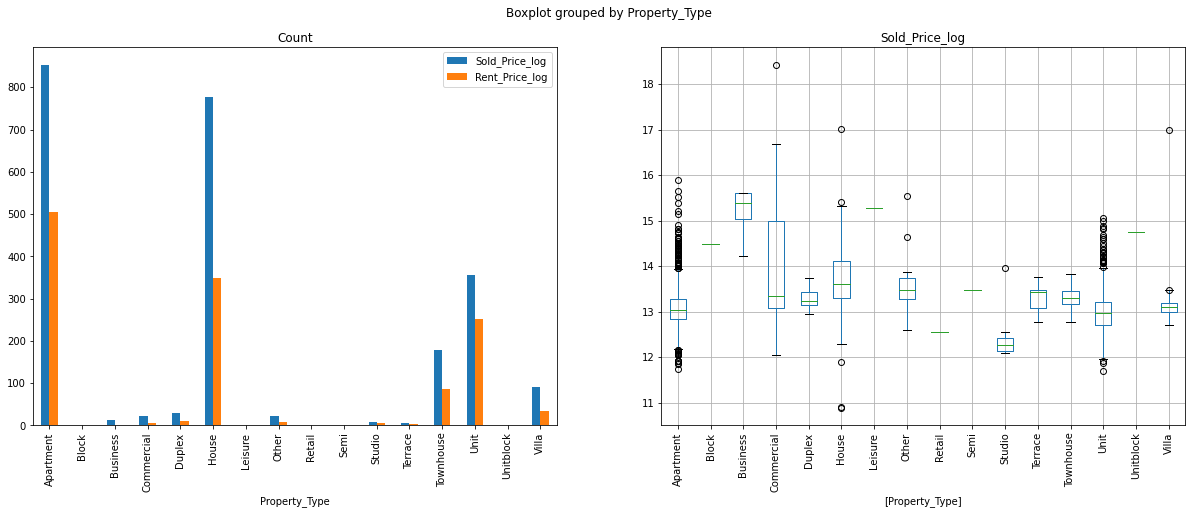

In [9]:
import math
import seaborn as sns
from matplotlib import pyplot as plt
import sys

df["Sold_Price_log"] = df.Sold_Price.apply(lambda x: math.log(x))
df["Rent_Price_log"] = df.Rent_Price.apply(lambda x: math.log(x))

df["Sold_Price_weighted"] = df.Sold_Price * df.Sold_timestamp
df["Rent_Price_weighted"] = df.Rent_Price * df.Rent_timestamp
df["Last_Sold__Price_weighted"] = df.Last_Sold_Price * df.Last_Sold_timestamp

df["Sold_Price_weighted_log"] = df.Sold_Price_weighted.apply(lambda x: math.log(x))
df["Rent_Price_weighted_log"] = df.Sold_Price_weighted.apply(lambda x: math.log(x))
df["Last_Sold_Price_weighted_log"] = df.Sold_Price_weighted.apply(lambda x: math.log(x))

fig, (ax, ax2) = plt.subplots(figsize=(20,7), ncols=2)
ax.set_title("Count")
df[["Sold_Price_log", "Rent_Price_log", "Property_Type"]].groupby("Property_Type").count().plot.bar(ax=ax)
df.boxplot(column=["Sold_Price_log"], by=["Property_Type"], rot=90, ax=ax2)

e:\lib\python37\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


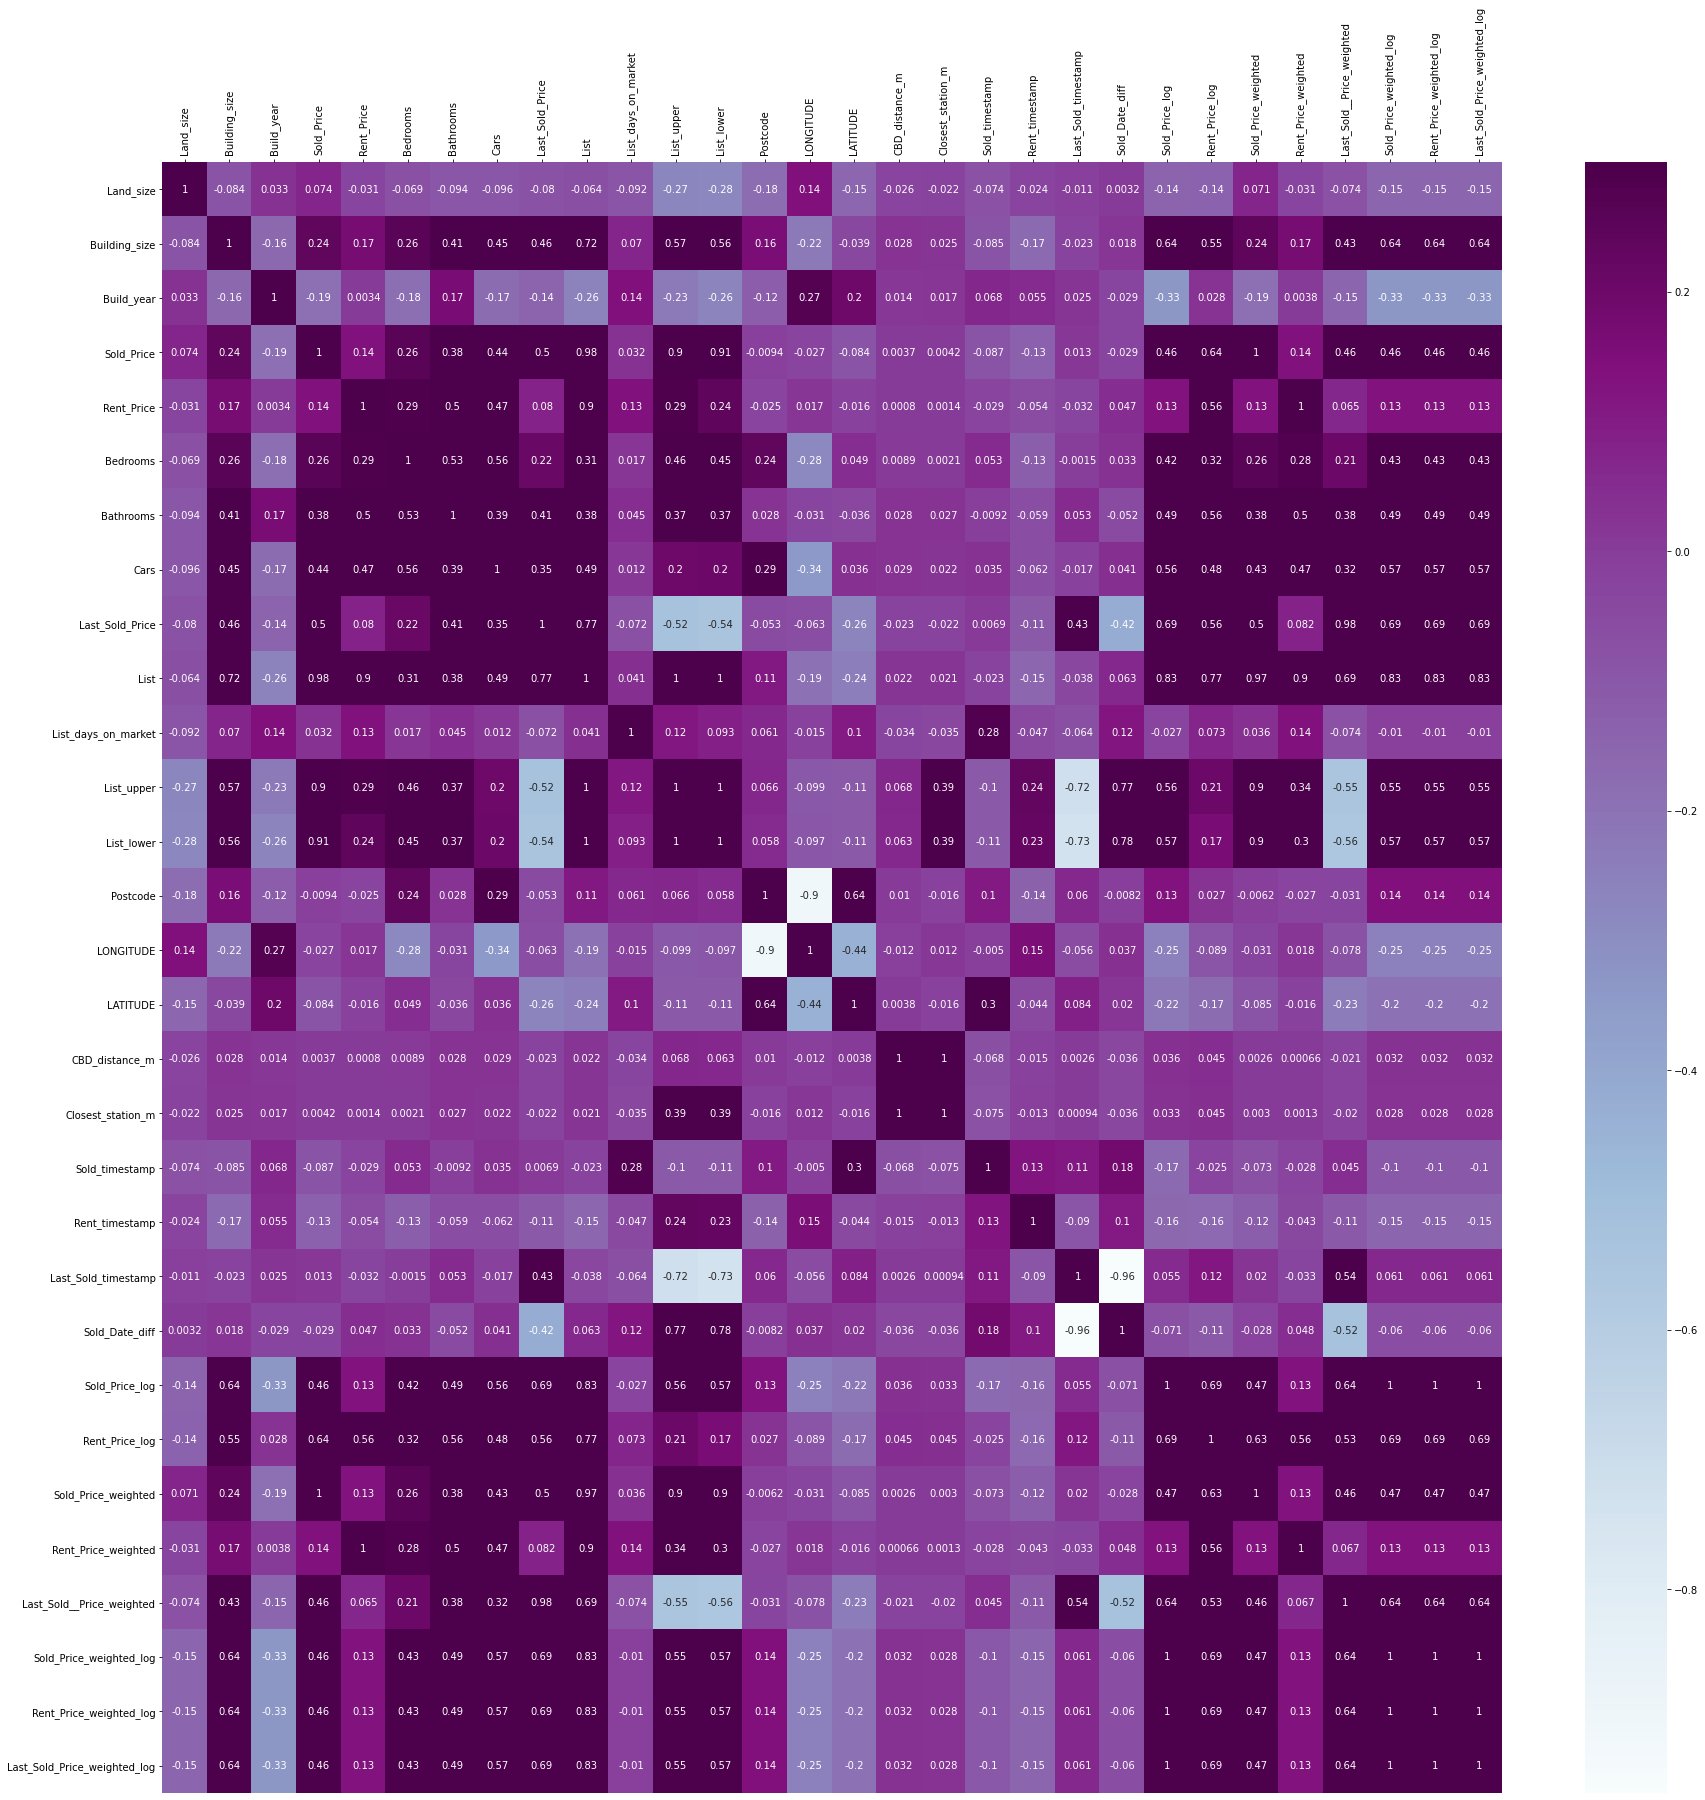

In [10]:
corrmat_cols = ['Sold_Price', 'Sold_Price_log', 'Land_size', 'Building_size', 'Bedrooms', 'Bathrooms', 'Cars', 'Last_Sold_Price', 
                'Build_year', 'Distance', 'Transport', 'Rent_Price', 
                'Sold_timestamp', 'Rent_timestamp', 'Last_Sold_timestamp', 'Sold_Date_diff', 
                'Last_Sold_Date', 'List', 'List_days_on_market',
                'List_upper', 'List_lower', 'Postcode', 'LONGITUDE', 'LATITUDE', 'CBD_distance_m', 'Closest_station_m']
corrmat = df.corr()

plt.figure(figsize=(30,30))
plt.axes().xaxis.tick_top()
plt.axes().xaxis.set_label_position('top')
g = sns.heatmap(corrmat,annot=True, cmap="BuPu", vmax=0.3)
plt.show()

In [11]:
df.columns[df.dtypes=="object"]

Index(['Agent', 'Sold_Date', 'Rent_Date', 'Property_Type', 'Address', 'Suburb',
       'Last_Sold_Date', 'Suburb_state', 'State'],
      dtype='object')

Property_Type
AxesSubplot(0.125,0.125;0.352273x0.755)
Suburb
AxesSubplot(0.547727,0.125;0.352273x0.755)


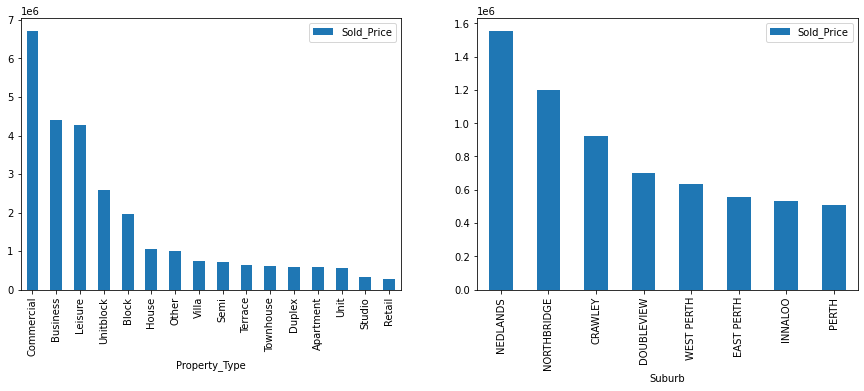

In [12]:
target = "Sold_Price"
piv_cols = ["Property_Type", "Suburb"]
piv_df = df[(piv_cols + [target])]
fig, ax_list = plt.subplots(figsize=(15,5), ncols=len(piv_cols))
for i, col in enumerate(piv_cols):
    print(col)
    print(pd.pivot_table(piv_df, index=col, values=target).sort_values(target, ascending=False).plot.bar(ax=ax_list[i]))

array([[<AxesSubplot:title={'center':'Sold_Price_log'}>,
        <AxesSubplot:title={'center':'Land_size'}>,
        <AxesSubplot:title={'center':'Building_size'}>],
       [<AxesSubplot:title={'center':'Build_year'}>,
        <AxesSubplot:title={'center':'Sold_timestamp'}>,
        <AxesSubplot:title={'center':'Rent_Price_log'}>],
       [<AxesSubplot:title={'center':'Bedrooms'}>,
        <AxesSubplot:title={'center':'Bathrooms'}>,
        <AxesSubplot:title={'center':'Cars'}>]], dtype=object)

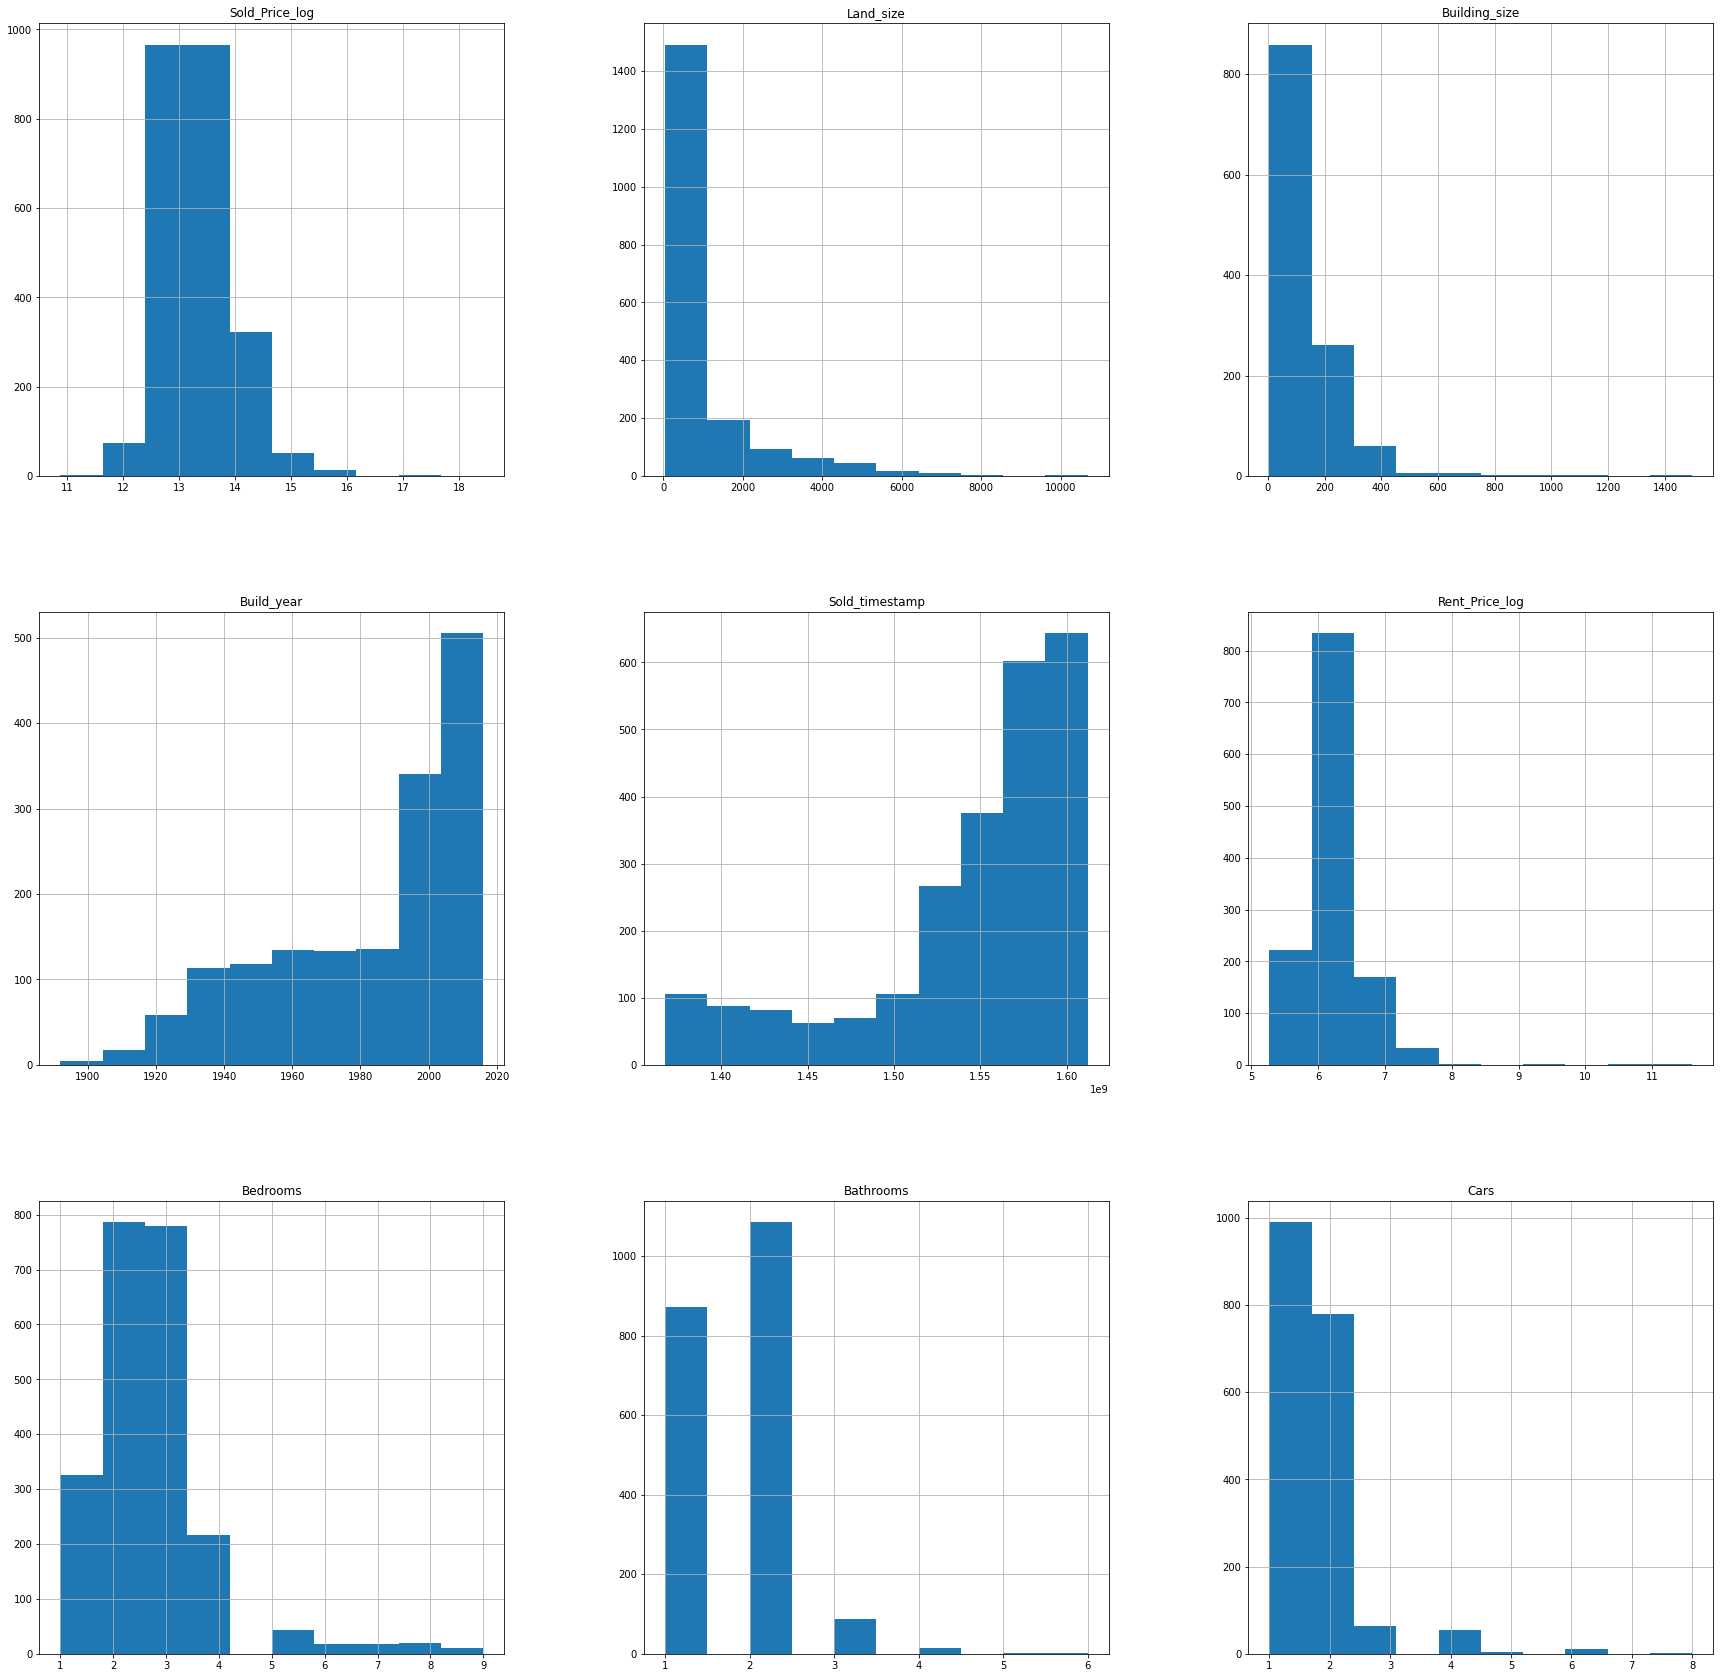

In [13]:
df[['Sold_Price_log', 'Land_size', 'Building_size', 'Build_year', 'Sold_timestamp', 'Rent_Price_log', 'Bedrooms', 'Bathrooms', 'Cars']].hist(figsize=(30,30))

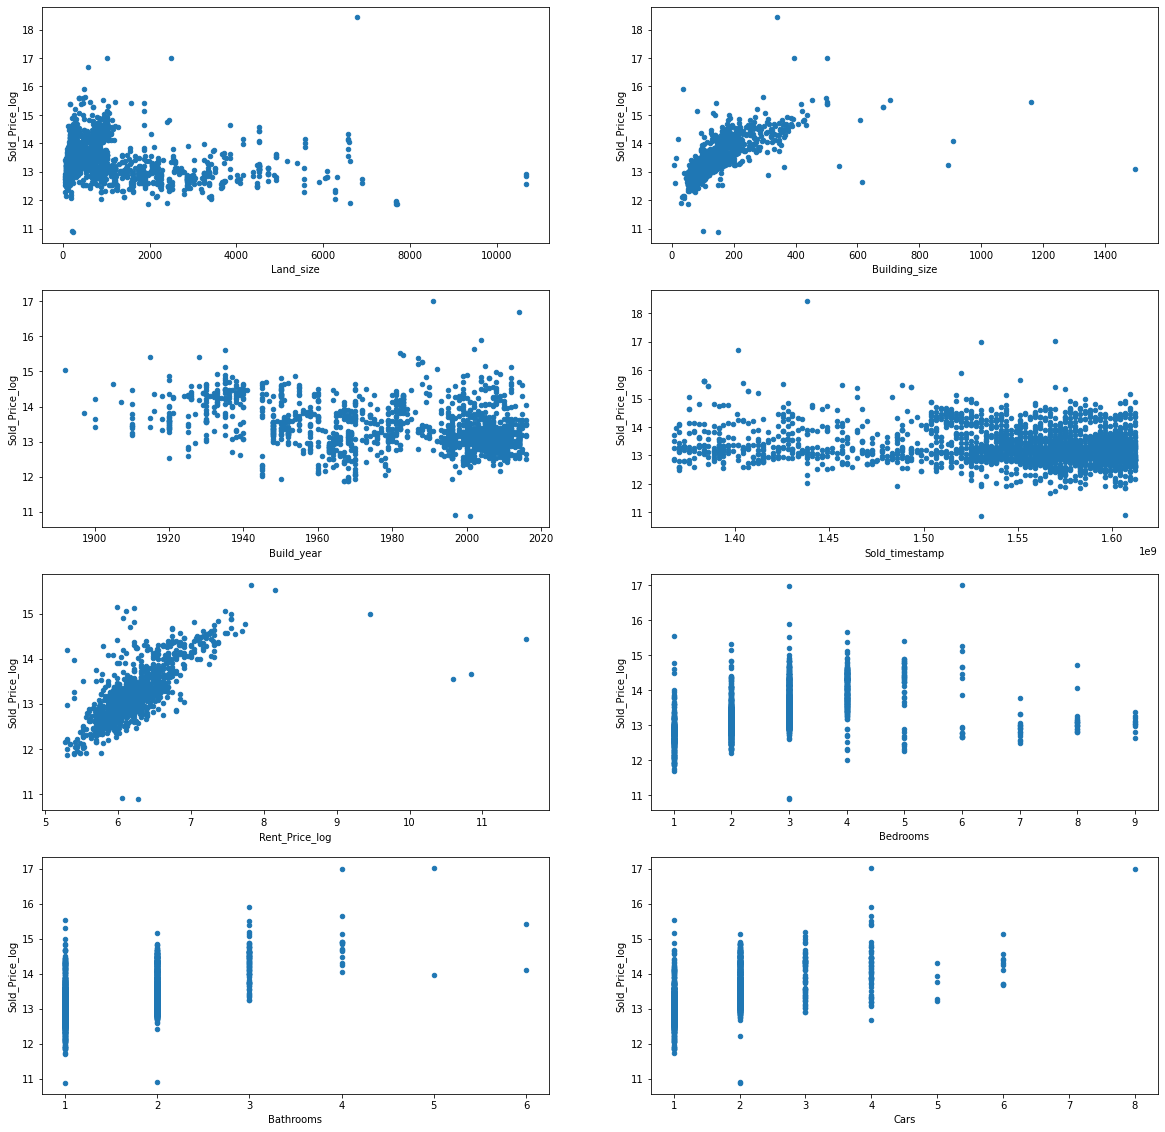

In [14]:
from matplotlib import pyplot as plt

plot_cols = ['Land_size', 'Building_size', 'Build_year', 'Sold_timestamp', 'Rent_Price_log', 'Bedrooms', 'Bathrooms', 'Cars']

fig, ax_list = plt.subplots(figsize=(20,20), nrows=4, ncols=2)

for i, col in enumerate(plot_cols):
    df.plot.scatter(x=col, y="Sold_Price_log", ax=ax_list.flatten()[i])    

<AxesSubplot:title={'center':'nans'}>

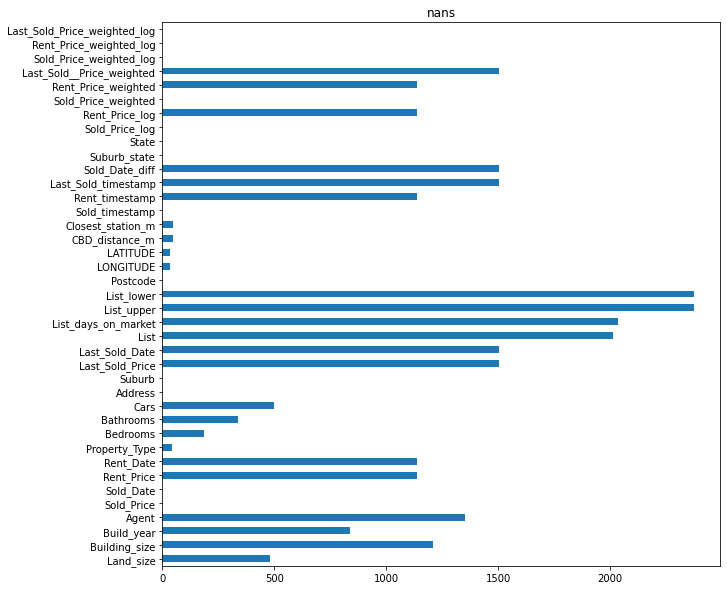

In [15]:
plt.figure(figsize=(10,10))
plt.title("nans")
df.isna().sum().plot.barh()

e:\lib\python37\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
e:\lib\python37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
e:\lib\python37\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new in

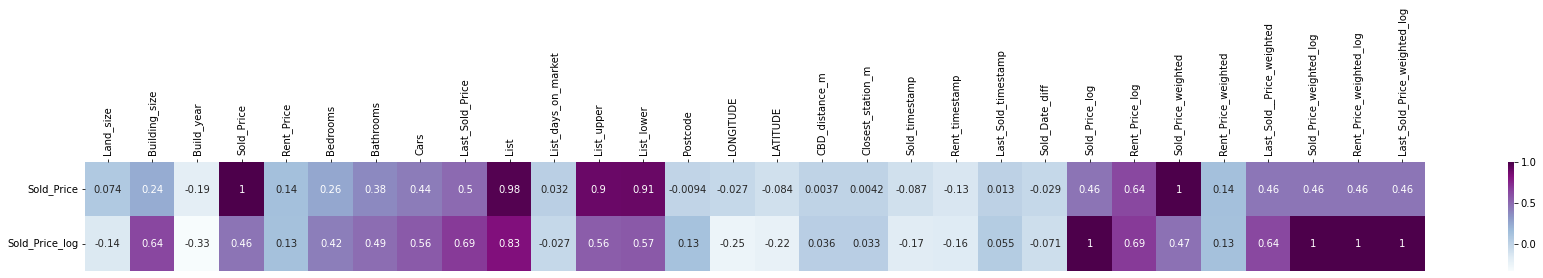

In [16]:
corrmat = df.corr()[["Sold_Price","Sold_Price_log"]].T

plt.figure(figsize=(30,2))
plt.axes().xaxis.tick_top()
plt.axes().xaxis.set_label_position('top')
plt.axes().yaxis.tick_left()
plt.axes().set_ylabel(["Sold_Price", "Sold_Price_log"])
plt.setp(plt.axes().get_yticklabels(), rotation=90, va="center")
g = sns.heatmap(corrmat,annot=True, cmap="BuPu")
plt.show()

# Geospatial analysis

In [17]:
import geopandas as gpd
from shapely.geometry import Point

In [18]:
wa_shp = gpd.read_file('gnaf/WA_LOCALITY_POLYGON_shp_GDA2020.shp')

wa_shp.head()

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,WA_LOCALIT,WA_LOCAL_1,WA_LOCAL_2,WA_LOCAL_3,WA_LOCAL_4,WA_LOCAL_5,WA_LOCAL_6,WA_LOCAL_7,geometry
0,20284,2021-02-09,None,WA2324,2015-11-09,None,NANGEENAN,None,None,G,None,5,"POLYGON ((118.27546 -31.54482, 118.27676 -31.5..."
1,20299,2021-02-09,None,WA3294,2015-11-09,None,EAGLE BAY,None,None,G,None,5,"POLYGON ((115.06306 -33.55427, 115.06308 -33.5..."
2,20342,2021-02-09,None,WA3035,2015-11-09,None,KALGUP,None,None,G,None,5,"POLYGON ((115.39302 -33.69740, 115.39346 -33.6..."
3,21058,2021-02-09,None,WA1702,2018-05-05,None,MARDIE,None,None,G,None,5,"POLYGON ((115.46414 -21.26423, 115.46377 -21.2..."
4,21055,2021-02-09,None,WA1702,2018-05-05,None,MARDIE,None,None,G,None,5,"POLYGON ((116.24196 -20.80895, 116.24148 -20.8..."


In [19]:
gdf = df.dropna(subset=["LONGITUDE"])
gdf = gpd.GeoDataFrame(gdf, geometry = gpd.points_from_xy(gdf.LONGITUDE, gdf.LATITUDE), crs = wa_shp.crs)

In [20]:
perth = wa_shp.loc[wa_shp.WA_LOCAL_2.apply(lambda x: True if x in df.Suburb.unique() else False)]

In [21]:
gdf = gdf.to_crs('EPSG:8024')
perth = perth.to_crs('EPSG:8024')

gdf = gdf.dropna(subset=['geometry'])

<AxesSubplot:>

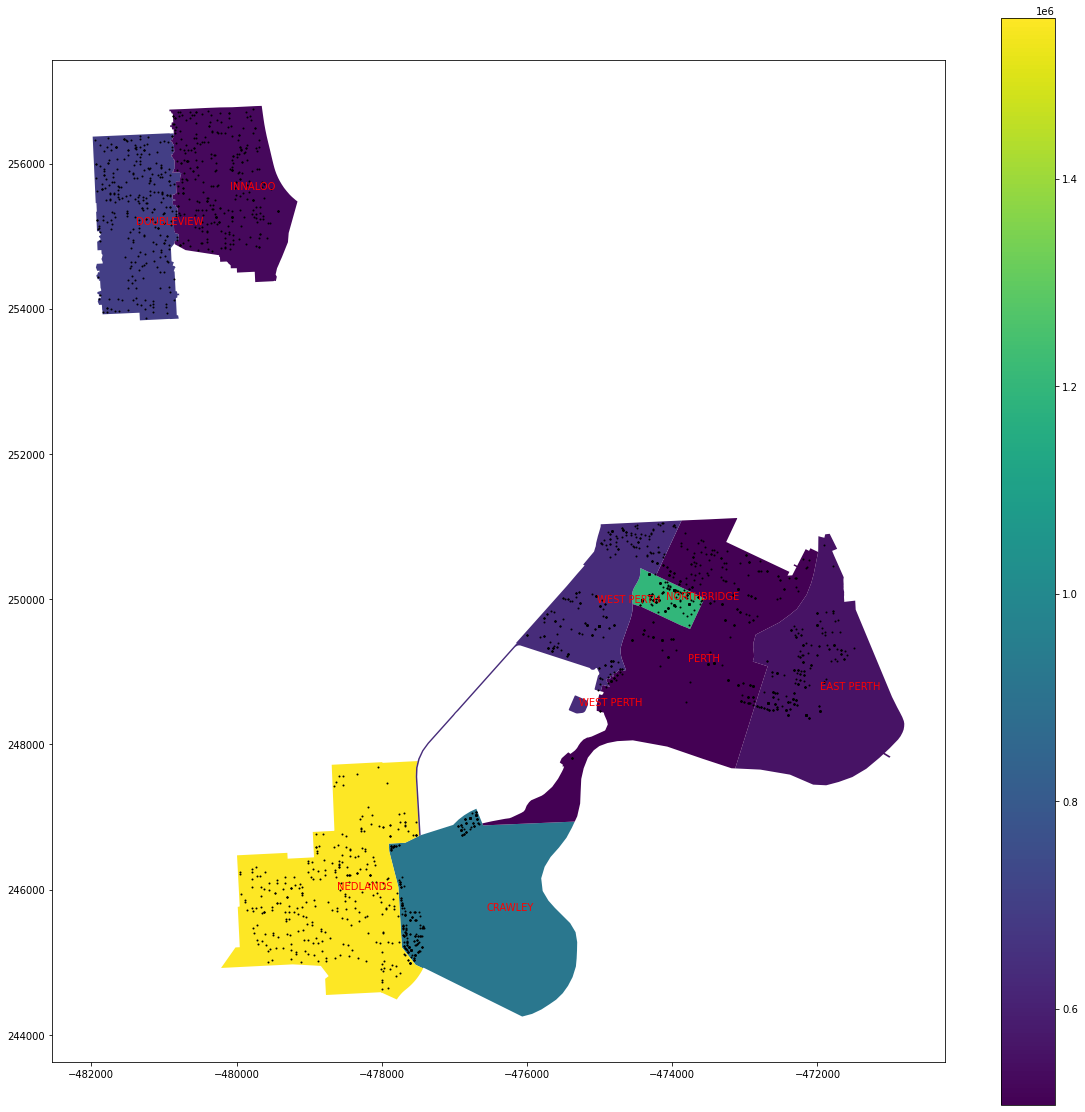

In [22]:
fig, ax = plt.subplots(figsize=(20,20))

mean_perth = perth.set_index("WA_LOCAL_2").join(df.groupby("Suburb").describe().Sold_Price["mean"])
mean_perth.plot(column="mean", legend = True, ax=ax)
for cent, lab in zip(mean_perth.geometry.centroid, mean_perth.index):
    ax.annotate(lab, xy=(cent.x, cent.y), color='red')

gdf.plot(ax=ax, markersize=1, color="black")

In [23]:
neighbour_list = []
neighbour_distance = 200
for x in gdf.geometry:
    neighbours = (gdf.geometry.distance(x)<neighbour_distance).sum()    
    neighbour_list.append(neighbours)

median:  22.0


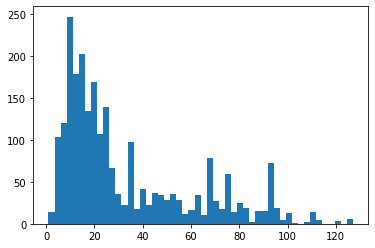

In [24]:
plt.hist(neighbour_list, bins=50)
print("median: ", np.median(neighbour_list))

200 meters seems like a good threshold for neighbourhood calculations

In [25]:
import warnings
#warnings.filterwarnings('ignore')

# all neighbours within 200 meters
PROX_M = 200

neighbour_cols = ['Sold_Price', 'Rent_Price', 'Last_Sold_Price', 'Sold_Price_log', 'Rent_Price_log', 'Sold_Price_weighted',
                      'Rent_Price_weighted', 'Last_Sold__Price_weighted', 'Sold_Price_weighted_log', 'Rent_Price_weighted_log',
                      'Last_Sold_Price_weighted_log', 'Sold_timestamp', 'Rent_timestamp', 'Last_Sold_timestamp', 'Sold_Date_diff',
                      'Land_size', 'Building_size', 'Bedrooms', 'Bathrooms', 'Cars']

for i, x in enumerate(gdf.geometry):
    dist = gdf.geometry.distance(x)
    
    neighbour_index = (gdf.geometry.distance(x) < PROX_M)
    # don't count itself
    neighbour_index[i] = False
    
    gdf.loc[i, "neighbours"] = len(neighbour_index)
    
    for col in neighbour_cols:        
        neighbour_avg = gdf[neighbour_index][col].mean()
        neighbour_min = gdf[neighbour_index][col].min()
        neighbour_max = gdf[neighbour_index][col].max()        
        
        gdf.loc[i, "neighbour_avg_"+col] = neighbour_avg
        gdf.loc[i, "neighbour_min_"+col] = neighbour_min
        gdf.loc[i, "neighbour_max_"+col] = neighbour_max
        


e:\lib\python37\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
e:\lib\python37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
e:\lib\python37\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new in

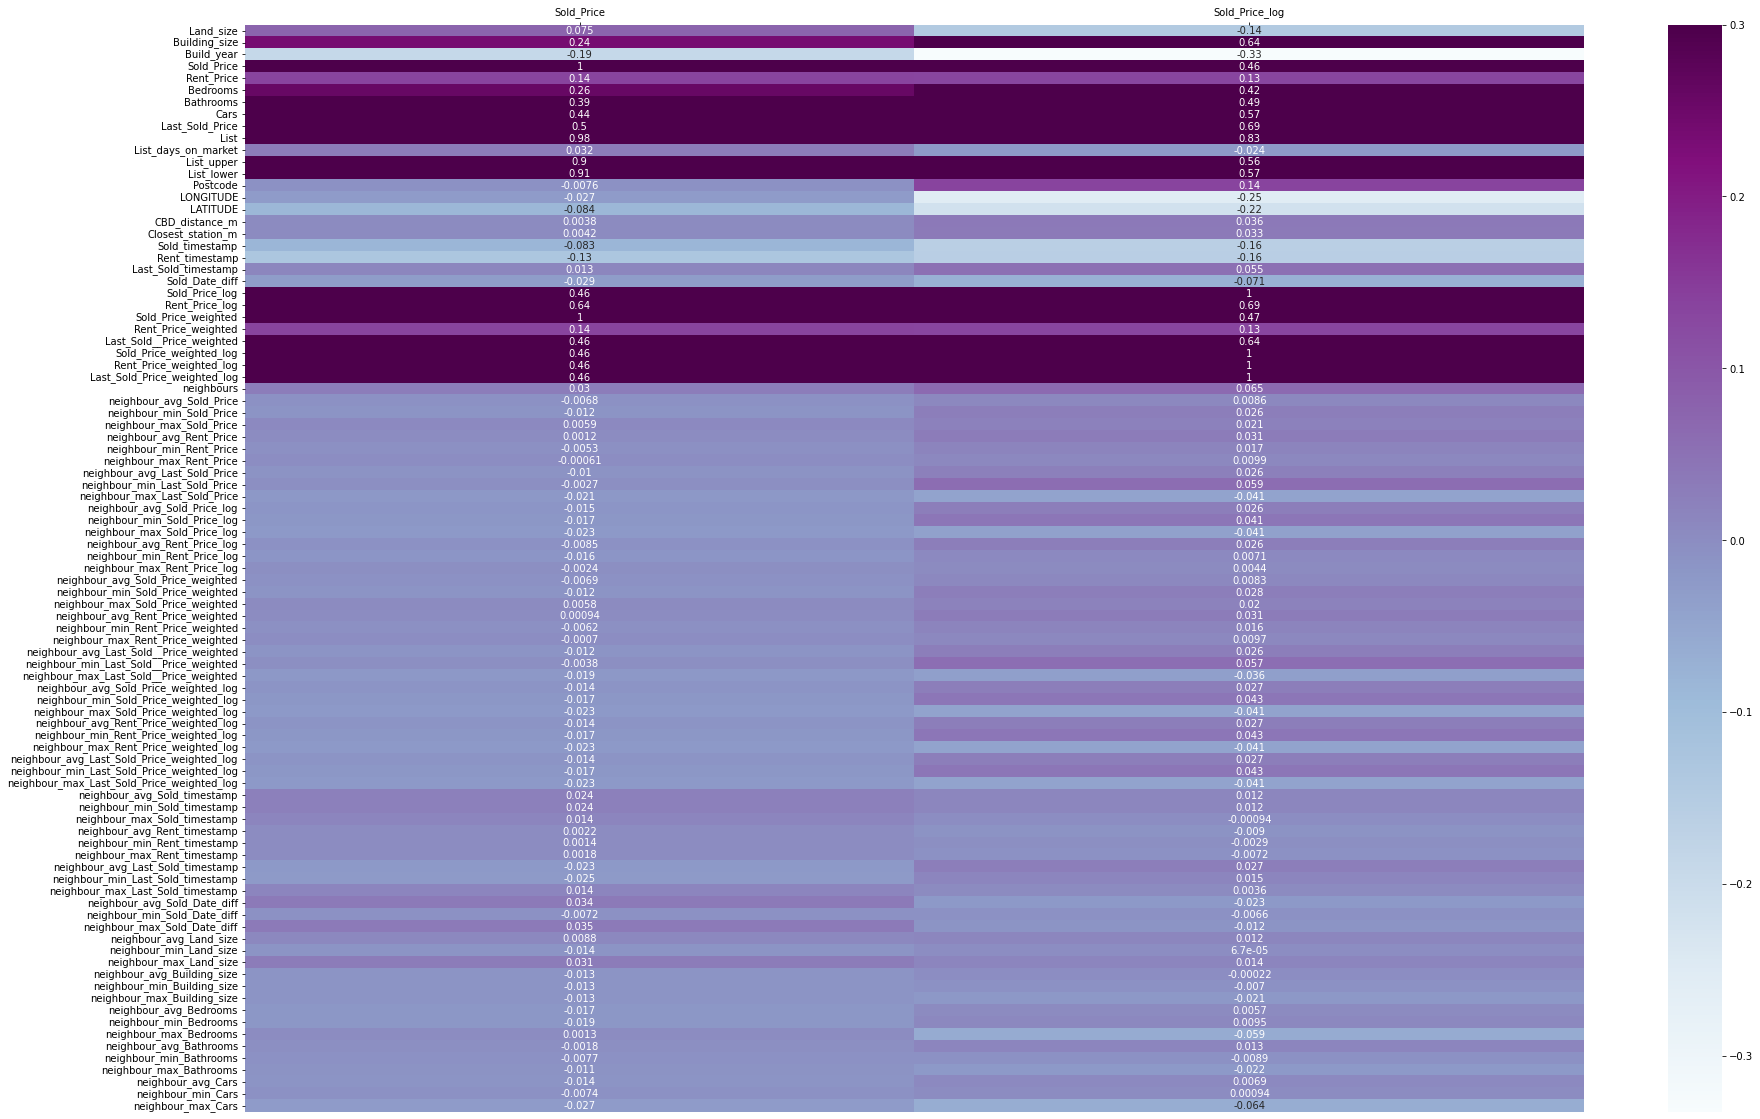

In [26]:
corrmat = gdf.corr()[["Sold_Price","Sold_Price_log"]]

plt.figure(figsize=(30,20))
plt.axes().xaxis.tick_top()
plt.axes().xaxis.set_label_position('top')
plt.axes().yaxis.tick_left()
plt.axes().set_ylabel(["Sold_Price", "Sold_Price_log"])
plt.setp(plt.axes().get_yticklabels(), rotation=90, va="center")
g = sns.heatmap(corrmat,annot=True, cmap="BuPu", vmax=0.3)
plt.show()

In [27]:
gdf.to_csv("data/Final_Perth_Housing.csv")